In [1]:
import pickle
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
with open('../results/Human_Promoter_Analysis_euclidean_v8/Stored_Values/PAttn_batch-0.pckl','rb') as f:
    data = pickle.load(f)

In [3]:
data.shape

(256, 100, 800)

In [4]:
data[0].shape

(100, 800)

### Depiction of self-attention scores across all 8 heads: an example

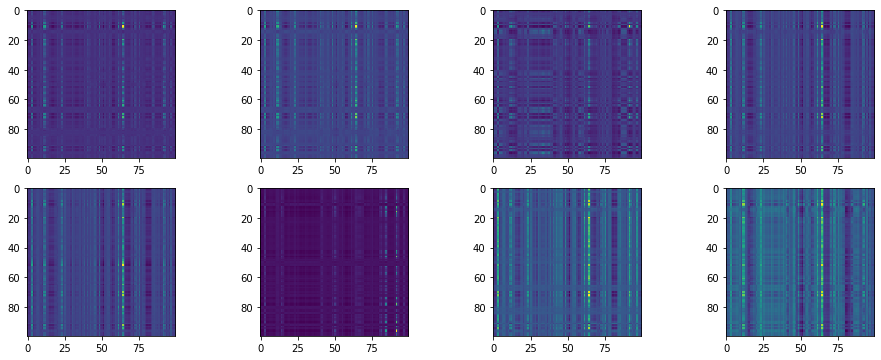

In [5]:
#figure(num=None, figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')
fig, ax = plt.subplots(2, 4, figsize=(16,6))
i = 0
for row in ax:
    for col in row:
        col.imshow(data[0][:,i*100:(i+1)*100])
        i += 1

In [6]:
with open('../results/Human_Promoter_Analysis_euclidean_v8/Interactions_SATORI/interaction_keys_dict.pckl','rb') as f:
    intr_keys = pickle.load(f)

In [7]:
with open('../results/Human_Promoter_Analysis_euclidean_v8/Interactions_SATORI/main_results_raw.pckl','rb') as f:
    attentions, positions, seqposes = pickle.load(f)

In [8]:
seqposes[0][1][0], list(seqposes[0][0].keys())[0]

(4, '>chr9:140512952-140513552(+)')

In [9]:
df = pd.read_csv('../results/Human_Promoter_Analysis_euclidean_v8/Motif_Analysis/tomtom/tomtom.txt',sep='\t')

In [10]:
df.head()

,Query_ID,Target_ID,Optimal_offset,p-value,E-value,q-value,Overlap,Query_consensus,Target_consensus,Orientation
0,filter0,M1592_1.02,-3.0,2.055640e-07,0.000151,0.000295,8.0,GAATTTGTATAAT,ATTGTTTT,-
1,filter0,M1605_1.02,-3.0,9.864270e-07,0.000723,0.000709,10.0,GAATTTGTATAAT,ATTCATCTTT,+
2,filter0,M0408_1.02,-2.0,4.973820e-06,0.003646,0.001787,10.0,GAATTTGTATAAT,ATGTGCACAT,+
3,filter0,M0607_1.02,-4.0,6.611760e-06,0.004846,0.001863,9.0,GAATTTGTATAAT,GCGTAAATA,+
4,filter0,M0942_1.02,-4.0,8.898670e-06,0.006523,0.001863,8.0,GAATTTGTATAAT,TTGTAATT,+


In [11]:
df_gby = df.groupby('Target_ID')['Query_ID'].value_counts()

In [12]:
df_intr = pd.read_csv('../results/Human_Promoter_Analysis_euclidean_v8/Interactions_SATORI/interactions_summary_attnLimit-0.12.txt',sep='\t')

In [13]:
df_intr.shape

(577, 12)

In [14]:
df_intr = df_intr[(df_intr['motif1_qval']<0.01) & (df_intr['motif2_qval']<0.01)]

In [15]:
df_intr.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval
0,filter0<-->filter21,20,M1592_1.02,0.000295,M0891_1.02,0.003707,30.0,24.0,153.0,274.0,9.404829e-05,1.187389e-04
2,filter0<-->filter101,100,M1592_1.02,0.000295,M1110_1.02,0.004396,90.0,30.0,174.0,368.0,6.469072e-06,9.480131e-06
4,filter0<-->filter133,132,M1592_1.02,0.000295,M0609_1.02,0.004863,120.0,312.0,222.0,320.0,2.358174e-23,6.692563e-22
46,filter2<-->filter21,415,M1605_1.02,0.002335,M0891_1.02,0.003707,126.0,252.0,55.0,197.0,5.520028e-02,5.643256e-02
48,filter2<-->filter101,495,M1605_1.02,0.002335,M1110_1.02,0.004396,246.0,198.0,61.0,264.0,6.683777e-07,1.164029e-06


In [16]:
df_intr = df_intr[df_intr['adjusted_pval']<0.05].reset_index(drop=True)

In [17]:
df_intr.shape

(142, 12)

In [18]:
df_intr['filter1'] = df_intr['filter_interaction'].apply(lambda x: x.split('<-->')[0])
df_intr['filter2'] = df_intr['filter_interaction'].apply(lambda x: x.split('<-->')[1])
df_intr['motif_interaction'] = df_intr.apply(lambda x: x['motif1']+'<-->'+x['motif2'], axis=1)

In [19]:
df_intr.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,filter1,filter2,motif_interaction
0,filter0<-->filter21,20,M1592_1.02,0.000295,M0891_1.02,0.003707,30.0,24.0,153.0,274.0,9.404829e-05,1.187389e-04,filter0,filter21,M1592_1.02<-->M0891_1.02
1,filter0<-->filter101,100,M1592_1.02,0.000295,M1110_1.02,0.004396,90.0,30.0,174.0,368.0,6.469072e-06,9.480131e-06,filter0,filter101,M1592_1.02<-->M1110_1.02
2,filter0<-->filter133,132,M1592_1.02,0.000295,M0609_1.02,0.004863,120.0,312.0,222.0,320.0,2.358174e-23,6.692563e-22,filter0,filter133,M1592_1.02<-->M0609_1.02
3,filter2<-->filter101,495,M1605_1.02,0.002335,M1110_1.02,0.004396,246.0,198.0,61.0,264.0,6.683777e-07,1.164029e-06,filter2,filter101,M1605_1.02<-->M1110_1.02
4,filter2<-->filter133,527,M1605_1.02,0.002335,M0609_1.02,0.004863,318.0,390.0,76.0,229.0,6.908516e-13,3.827515e-12,filter2,filter133,M1605_1.02<-->M0609_1.02


In [127]:
def get_filter_intr(list1, list2):
    comb_list = []
    for f1 in list1.keys():
        if f1 in list2.keys():
                continue
        for f2 in list2.keys():
            if f2 in list1.keys():
                continue
            comb_list.append(f"{f1}<-->{f2}")
            comb_list.append(f"{f2}<-->{f1}")
    return comb_list

def get_attns(tp_indices, similar_fltrs_interactions, intr_keys, attentions):
    attns = {}
    for i in tp_indices:
        for key in similar_fltrs_interactions['filter_interaction']:
            index = intr_keys[key]
            attn = attentions[index, i]
            if attn >= 0.12:
                if i not in attns:
                    attns[i] = [[key, attn]]
                else:
                    if [key, attn] not in attns[i]:
                        attns[i].append([key,attn])
    return attns

### Distribution of interaction scores for redundant motif filters
Box and whisker plot using interaction scores between all filters learning motif-A and those that learn motif-B (filters that learn redundant motifs) is shown for 8 example sequences. For reference, the distribution scores across the whole dataset (for all filter-filter inteactions) is shown as 

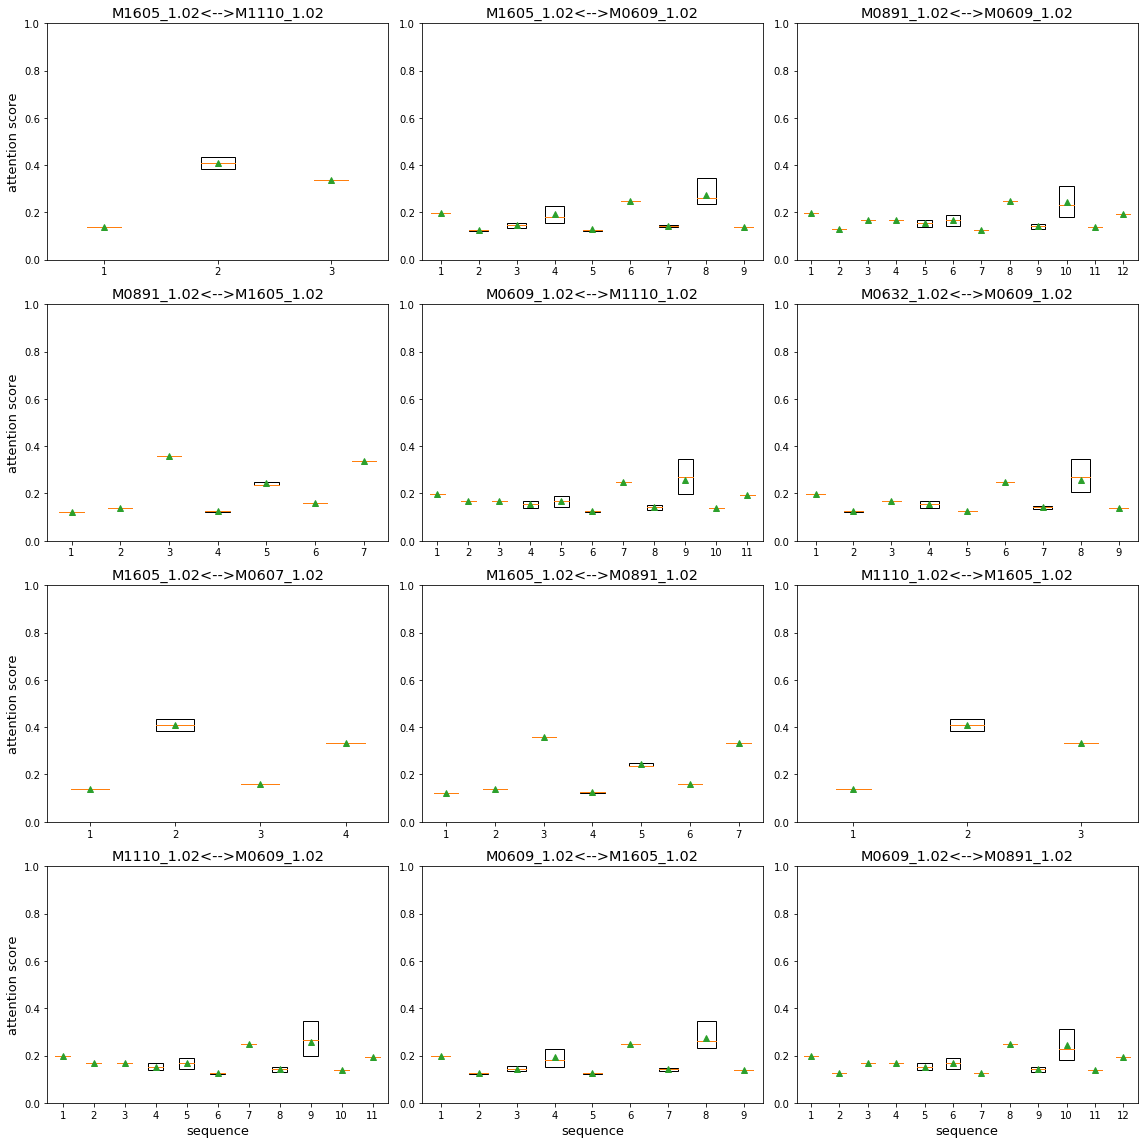

In [167]:
uniq_intr = df_intr['motif_interaction'].unique().tolist()
count = 0
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16, 16))
for mtf_intr in uniq_intr:
    motif1,motif2 = mtf_intr.split('<-->')
    list1 = df_gby[motif1]
    list2 = df_gby[motif2]
    comb_list = get_filter_intr(list1, list2)
    similar_fltrs_interactions = df_intr[df_intr['filter_interaction'].isin(comb_list)]
    tp_indices = []
    for i in range(0, len(seqposes)):
        tp_indices += seqposes[i][1]
    attns = get_attns(tp_indices, similar_fltrs_interactions, intr_keys, attentions)
    x = []
    y = []
    for key,value in attns.items():
        x.append(key)
        y.append(np.asarray(value)[:,1].astype(float))

    #attention_nonneg = attentions.flatten()
    #attn_nng = attention_nonneg[attention_nonneg>=0.12]
    if len(comb_list) < 500 or len(x)<2:
        continue
    row = int(count/3)
    col = int(count%3)
    ax = axes[row,col]
    bplot = ax.boxplot(y, showmeans=True, patch_artist=True, whis=0, showfliers=False)
    ax.set_xticks([i for i in range(1, len(y)+1)], [i for i in range(1, len(y)+1)])
    if col%3==0: 
        ax.set_ylabel('attention score', size=13)
    if row==3:
        ax.set_xlabel('sequence', size=13)
    ax.set_ylim([0,1])
    ax.set_title(mtf_intr, size=14.5)
    for i in range(0, len(bplot['boxes'])-1):
        bplot['boxes'][i].set_facecolor('white')
    bplot['boxes'][-1].set_facecolor('pink')
    count += 1
fig.tight_layout()
plt.savefig('attention_motif_analysis.pdf')
plt.show()